In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from fbprophet import Prophet

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv("diplom_data/Oxford.csv", parse_dates=['time'], date_parser=dateparse, index_col='time')

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekOfYear'] = df.index.weekofyear

In [3]:
df.head()

,temperature,windSpeed,cloudCover,humidity,visibility,icon,apparentTemperature,summary,dewPoint,Year,Month,Day,WeekOfYear
time,,,,,,,,,,,,,
2017-01-01 03:00:00,44.43,3.37,0.75,0.92,4.97,partly-cloudy-night,43.00,Mostly Cloudy,42.28,2017,1,1,52
2017-01-01 04:00:00,43.95,3.60,0.75,0.92,3.73,partly-cloudy-night,42.24,Mostly Cloudy,41.86,2017,1,1,52
2017-01-01 05:00:00,43.77,3.94,1.00,0.93,2.98,cloudy,41.72,Overcast,41.76,2017,1,1,52
2017-01-01 06:00:00,43.84,3.75,0.75,0.92,3.11,partly-cloudy-night,41.97,Mostly Cloudy,41.67,2017,1,1,52
2017-01-01 07:00:00,43.80,2.55,0.75,0.92,3.11,partly-cloudy-night,43.80,Mostly Cloudy,41.67,2017,1,1,52


In [24]:
gr_17 = df.groupby(by="Month")["temperature"].mean()
pd.concat([gr_17, ])

Month
1     40.317453
2     40.503601
3     44.996304
4     50.071194
5     56.957688
6     62.729175
7     66.355407
8     62.307791
9     57.182519
10    53.245769
11    45.791624
12    43.317764
Name: temperature, dtype: float64

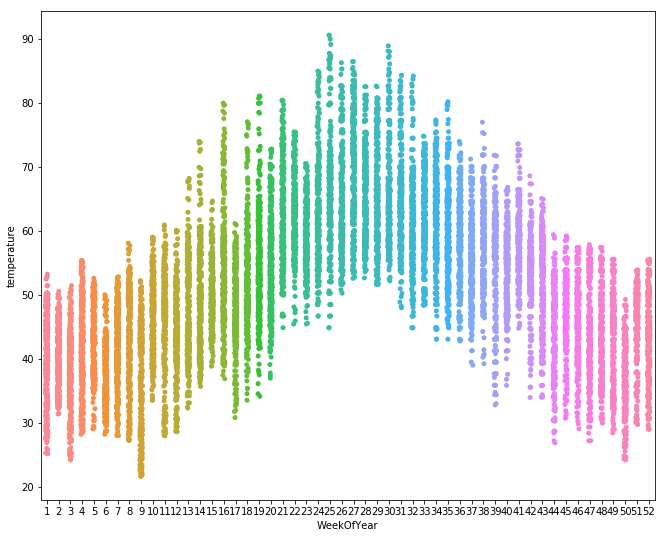

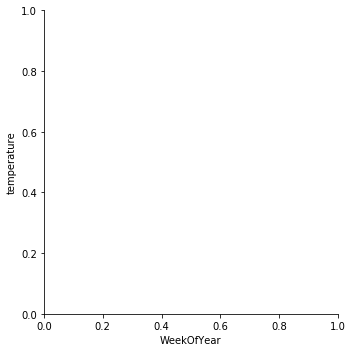

In [36]:
f, ax = plt.subplots(figsize = (11, 9))
sns.catplot(data=df, x="WeekOfYear", y="temperature", ax=ax)
plt.show()

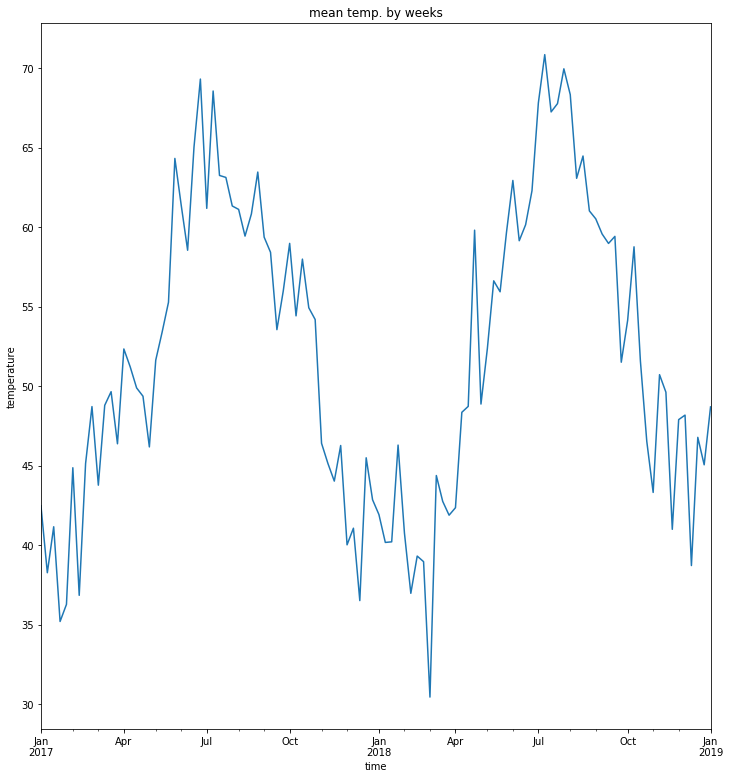

In [42]:
f, ax = plt.subplots(figsize = (12, 13))
df['temperature'].resample('W').mean().plot(ax = ax, title="mean temp. by weeks")
ax.set_ylabel("temperature");

/home/max/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


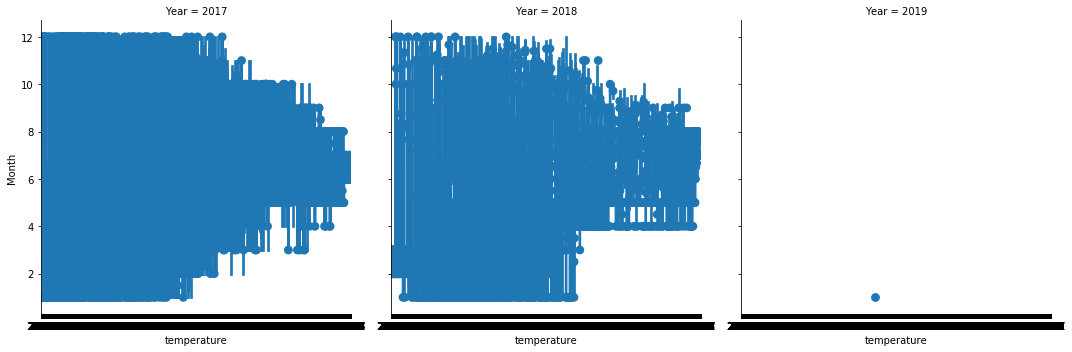

In [19]:
gr_17 = 
sns.catplot(data=df, x="temperature", y="Month", col="Year")

In [4]:
data = pd.DataFrame()

In [11]:
data['ds'] = df.index
data['y'] = df['temperature'].values


In [13]:
model = Prophet()
model.fit(data)

/home/max/.local/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [17]:
future = model.make_future_dataframe(periods=90*24, freq='H')
future.tail()

,ds
19624,2019-03-31 22:00:00
19625,2019-03-31 23:00:00
19626,2019-04-01 00:00:00
19627,2019-04-01 01:00:00
19628,2019-04-01 02:00:00


In [15]:
forecast = model.predict(future)
model.plot(forecasst)

NameError: name 'forecast' is not defined

/home/max/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


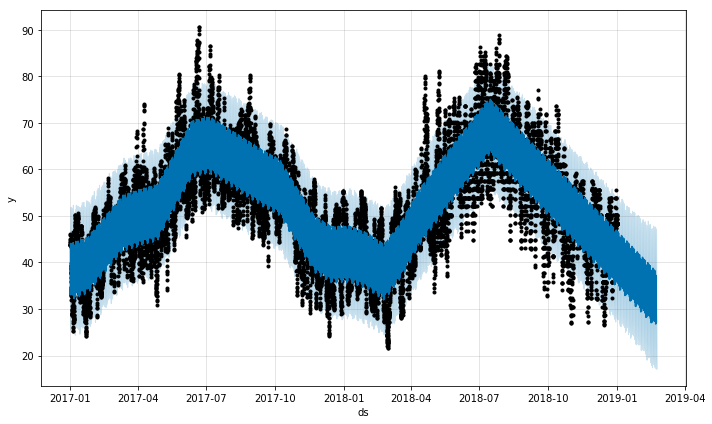

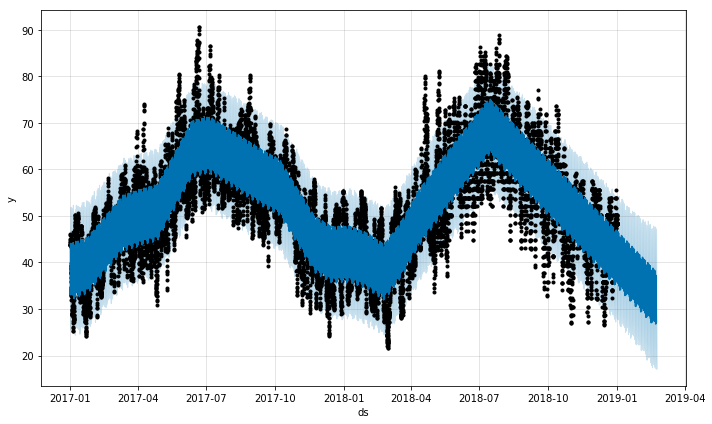

In [16]:
model.plot(forecasst)